In [621]:
import torch
import torchvision
import torch.nn as nn
from torchvision import utils
import numpy as np
import matplotlib.pyplot as plt
import models.resnet_ECA_parallel_SC as resnet_ECA_parallel
import models.resnet_ECA_last_block_SC as resnet_ECA_last

plt.ion() # interactive mode
%matplotlib inline

In [622]:
net = resnet_ECA_parallel.resnet34()
model_names = ['resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152']
types = ['teacher', 'student']
index = 6
modelname = model_names[1]
type = types[0]
net.load_state_dict(torch.load(f'./vanilla_kd_model_saved_base/{modelname}_{type}_{index}.pth',
                                   map_location=torch.device('cpu')))
net

ResNet(
  (layer0): Sequential(
    (0): ConvBN(
      (layer): Sequential(
        (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
      )
    )
    (1): Basic(
      (layer): Sequential(
        (0): ConvBN(
          (layer): Sequential(
            (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU(inplace=True)
          )
        )
        (1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (relu): ReLU(inplace=True)
      (eca_pool): Sequential(
        (0): AdaptiveAvgPool2d(output_size=1)
      )
      (eca_conv): Sequential(
        (0)

In [623]:
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

transform_test = transforms.Compose([
        #transforms.Grayscale(),
        transforms.ToTensor()])

testset = torchvision.datasets.CIFAR10(
    root='./cifar10', train=False)

testLoader = DataLoader(
    testset, batch_size=32, shuffle=False, num_workers=2)

In [624]:
weights = []
conv_layers = []
count = 0
for m in net.modules():
    if isinstance(m, nn.Conv2d):
        weights.append(m.weight)
        conv_layers.append(m)
        count +=1
    elif isinstance(m, nn.BatchNorm2d):
        weights.append(m.weight)
    elif isinstance(m, nn.Linear):
        weights.append(m.weight)
    # elif isinstance(m, nn.Sequential):
    #     for n in m.modules():
    #         if isinstance(n, nn.Conv2d):
    #             weights.append(n.weight)
    #             conv_layers.append(n)
    #             count +=1
print(count)

36


In [625]:
transform = transforms.Compose([
        #transforms.Grayscale(),
        transforms.ToTensor()])

0
1
2
3
4
5
6
7
9
10
11
12
13
14
15
16
18
19
20
21
22
23
24
25
26
27
28
29
31
32
33
34
35
33
torch.Size([1, 64, 32, 32])
torch.Size([1, 64, 32, 32])
torch.Size([1, 64, 32, 32])
torch.Size([1, 64, 32, 32])
torch.Size([1, 64, 32, 32])
torch.Size([1, 64, 32, 32])
torch.Size([1, 64, 32, 32])
torch.Size([1, 128, 16, 16])
torch.Size([1, 128, 16, 16])
torch.Size([1, 128, 16, 16])
torch.Size([1, 128, 16, 16])
torch.Size([1, 128, 16, 16])
torch.Size([1, 128, 16, 16])
torch.Size([1, 128, 16, 16])
torch.Size([1, 128, 16, 16])
torch.Size([1, 256, 8, 8])
torch.Size([1, 256, 8, 8])
torch.Size([1, 256, 8, 8])
torch.Size([1, 256, 8, 8])
torch.Size([1, 256, 8, 8])
torch.Size([1, 256, 8, 8])
torch.Size([1, 256, 8, 8])
torch.Size([1, 256, 8, 8])
torch.Size([1, 256, 8, 8])
torch.Size([1, 256, 8, 8])
torch.Size([1, 256, 8, 8])
torch.Size([1, 256, 8, 8])
torch.Size([1, 512, 4, 4])
torch.Size([1, 512, 4, 4])
torch.Size([1, 512, 4, 4])
torch.Size([1, 512, 4, 4])
torch.Size([1, 512, 4, 4])
torch.Size([1, 512, 

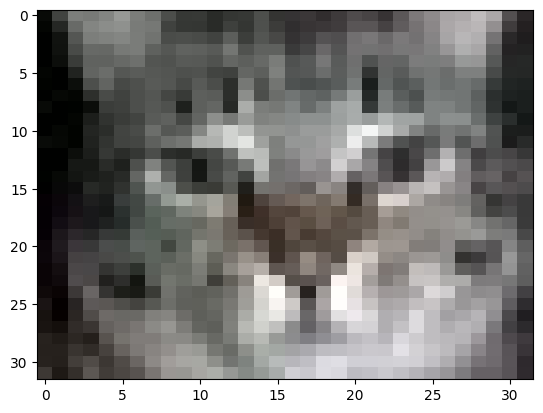

In [626]:
from PIL import Image


image = Image.open(str('cat.jpg'))
plt.imshow(image, aspect='auto')

image = transform(image)
image = image.unsqueeze(0)

outputs = []
names = []
for i in range(count):
    # parallel
    # resnet34_teacher_6
    if i == 8 or i == 17 or i == 30:
        continue

    # resnet18_student_6
    # if i == 6 or i == 11 or i == 16:
    #     continue

    # last
    # resnet18_student_41
    # if i == 6 or i == 11 or i == 17:
    #     continue
    # resnet34 student 10
    # if i in [8,17,31]:
    #     continue
    # resnet152 teacher 10
    # if i in [2,3,4,12,13,14,37,38,39,146,147,148]:
    #     continue
    print(i)
    image = conv_layers[i](image)
    outputs.append(image)
    names.append(str(conv_layers[i]))
print(len(outputs))
#print feature_maps
for feature_map in outputs:
    print(feature_map.shape)

In [627]:
processed = []

for feature_map in outputs:
    feature_map = feature_map.squeeze(0)
    gray_scale = torch.sum(feature_map, 0)
    gray_scale = gray_scale / feature_map.shape[0]
    processed.append((gray_scale.data.cpu().numpy()))

for fm in processed:
    print(fm.shape)

(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)


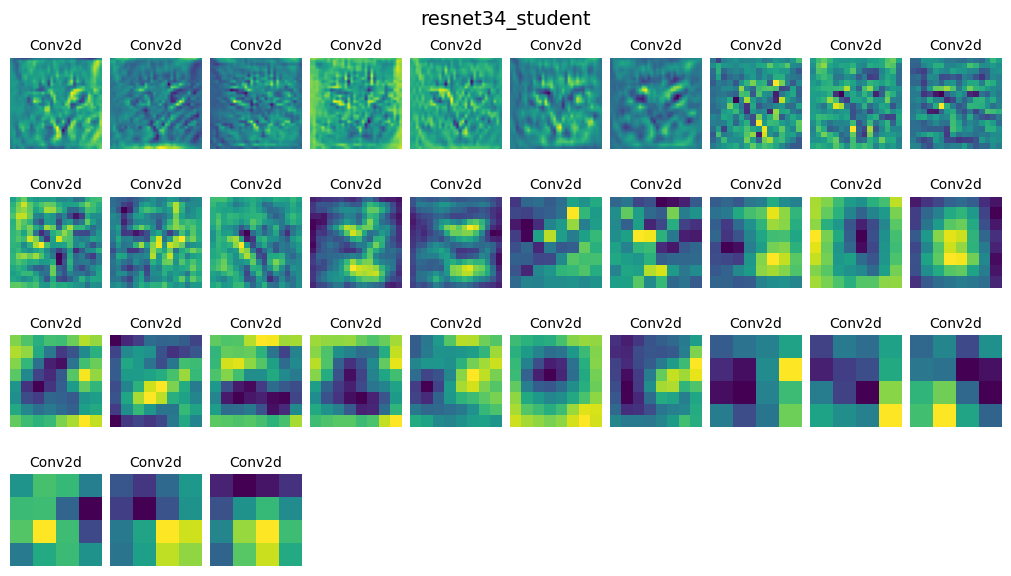

In [630]:
fig = plt.figure(figsize=(10,20), layout='constrained')
fig.suptitle(f'{modelname}_{type}', fontsize=14)
for i in range(len(processed)):
    a = fig.add_subplot(15, 10, i+1)
    imgplot = plt.imshow(processed[i])
    a.axis("off")
    a.set_title(names[i].split('(')[0], fontsize=10)

plt.savefig(str(f'./feature_maps/feature_maps_{modelname}_{type}_{index}.jpg'), bbox_inches='tight')
plt.show()

torch.Size([64, 3, 3, 3])


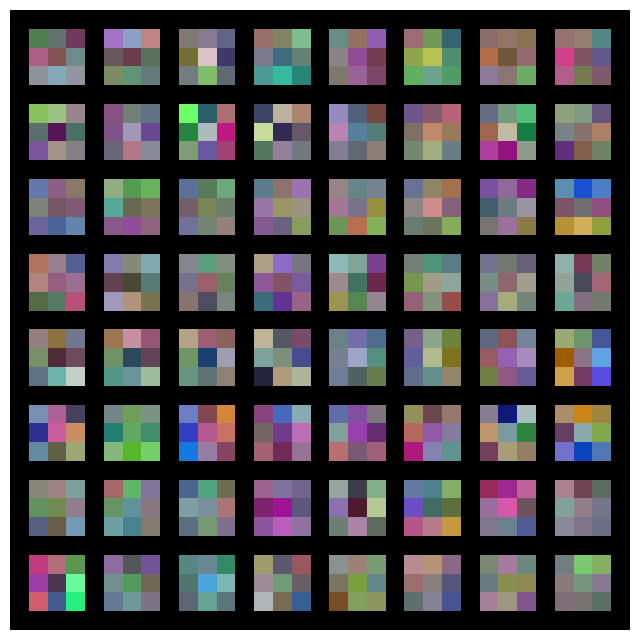

In [629]:
from torchvision import utils
import numpy as np
import matplotlib.pyplot as plt

def vistensor(tensor, ch=0, allkernels=False, nrow=8, padding=1):
    '''
    vistensor: visuzlization tensor
        @ch: visualization channel
        @allkernels: visualization all tensores
    '''

    n,c,w,h = tensor.shape
    if allkernels: tensor = tensor.view(n*c,-1,w,h )
    elif c != 3: tensor = tensor[:,ch,:,:].unsqueeze(dim=1)

    rows = np.min( (tensor.shape[0]//nrow + 1, 64 )  )
    grid = utils.make_grid(tensor, nrow=nrow, normalize=True, padding=padding)
    plt.figure( figsize=(nrow,rows) )
    plt.imshow(grid.numpy().transpose((1, 2, 0)))

# def savetensor(tensor, filename, ch=0, allkernels=False, nrow=8, padding=2):
#     '''
#     savetensor: save tensor
#         @filename: file name
#         @ch: visualization channel
#         @allkernels: visualization all tensores
#     '''
#
#     n,c,w,h = tensor.shape
#     if allkernels: tensor = tensor.view(n*c,-1,w,h )
#     elif c != 3: tensor = tensor[:,ch,:,:].unsqueeze(dim=1)
#     utils.save_image(tensor, filename, nrow=nrow )

vizable = []
for i in range(len(weights)):
    if weights[i].ndim == 4:
        vizable.append(i)



kernel = weights[vizable[0]].data.clone()
print(kernel.shape)

vistensor(kernel, ch=3, allkernels=False)
# savetensor(kernel,'kernel.png', allkernels=False)

plt.axis('off')
plt.ioff()
plt.show()